Source: https://miguelmalvarez.com/2015/03/20/classifying-reuters-21578-collection-with-python-representing-the-data/

In [1]:
from nltk.corpus import reuters

### Corpus stats

In [2]:
def collection_stats():
    documents = reuters.fileids()
    print(str(len(documents)) + " documents")
    
    train_docs = list(filter(lambda doc: doc.startswith("train"),
                            documents))
    print(str(len(train_docs)) + " total train documents")
    
    test_docs = list(filter(lambda doc: doc.startswith("test"),
                           documents))
    
    print(str(len(test_docs)) + " total test documents")
    
    # List of categories
    categories = reuters.categories()
    print(str(len(categories)) + " categories")
    
    # Documents in a category
    category_docs = reuters.fileids("acq")
    
    # Words for document
    document_id = category_docs[0]
    document_words = reuters.words(category_docs[0])
    print(document_words)
    
    # Raw document
    print(reuters.raw(document_id))

In [3]:
collection_stats()

10788 documents
7769 total train documents
3019 total test documents
90 categories
['SUMITOMO', 'BANK', 'AIMS', 'AT', 'QUICK', 'RECOVERY', ...]
SUMITOMO BANK AIMS AT QUICK RECOVERY FROM MERGER
  Sumitomo Bank Ltd &lt;SUMI.T> is certain to
  lose its status as Japan's most profitable bank as a result of
  its merger with the Heiwa Sogo Bank, financial analysts said.
      Osaka-based Sumitomo, with desposits of around 23.9
  trillion yen, merged with Heiwa Sogo, a small, struggling bank
  with an estimated 1.29 billion dlrs in unrecoverable loans, in
  October.
      But despite the link-up, Sumitomo President Koh Komatsu
  told Reuters he is confident his bank can quickly regain its
  position.
      "We'll be back in position in first place within three
  years," Komatsu said in an interview.
      He said that while the merger will initially reduce
  Sumitomo's profitability and efficiency, it will vastly expand
  Sumitomo's branch network in the Tokyo metropolitan area where
  it ha

### Document Representation and weighting

In [3]:
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords

cached_stop_words = stopwords.words("english")

def tokenize(text):
    min_length = 3
    words = map(lambda word: word.lower(), word_tokenize(text))
    words = [word for word in words
                if word not in cached_stop_words]
    
    tokens = (list(map(lambda token: PorterStemmer().stem(token),
                      words)))
    
    p = re.compile('[a-zA-Z]+')
    filtered_tokens = \
        list(filter(lambda token:
                    p.match(token) and len(token) >= min_length,
                   tokens))
        
    return filtered_tokens

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Return the representer, without transforming
def tf_idf(docs):
    tfidf = TfidfVectorizer(tokenizer=tokenize, min_df=3,
                        max_df=0.90, max_features=3000,
                        use_idf=True, sublinear_tf=True,
                        norm='l2');
    tfidf.fit(docs);
    return tfidf;

In [5]:
def feature_values(doc, representer):
    doc_representation = representer.transform([doc])
    features = representer.get_feature_names()
    return [(features[index], doc_representation[0, index])
                 for index in doc_representation.nonzero()[1]]

In [12]:
def main():
    train_docs = []
    test_docs = []
    
    counter = 1
 
    for doc_id in reuters.fileids():
        if counter < 10000:
            if doc_id.startswith("train"):
                train_docs.append(reuters.raw(doc_id))
            else:
                test_docs.append(reuters.raw(doc_id))
        
        counter += 1
 
    representer = tf_idf(train_docs);
 
    for doc in test_docs[:10]:
        print(feature_values(doc, representer))

In [13]:
main()

[('yesterday', 0.040544656930968107), ('year', 0.048523977933166748), ('yasuhiro', 0.067677005702934515), ('would', 0.063720846991738384), ('worri', 0.063676410398477407), ('world', 0.064802340038079623), ('work', 0.042251959993935766), ('whose', 0.060401706079358616), ('whole', 0.058408677009734268), ('week', 0.033259273803961341), ('washington', 0.051091509389807686), ('warn', 0.055555651985466276), ('want', 0.044303460144781197), ('virtual', 0.064539276657100852), ('view', 0.087341627355791221), ('u.s.-japan', 0.077027298729502522), ('u.s.', 0.10370715732580421), ('two', 0.048678979437021874), ('trade', 0.11365328894735791), ('tough', 0.06515792089182873), ('tom', 0.072231144513242668), ('told', 0.032582334376736896), ('tokyo', 0.09012440517761601), ('time', 0.036985316655361034), ('threat', 0.060603782081520584), ('third', 0.045165111364450818), ('textil', 0.062382972029937769), ('tax', 0.037396844381703584), ('tariff', 0.13460882572566393), ('talk', 0.04043095653861177), ('taiwan'

Source: http://scikit-learn.org/stable/auto_examples/applications/plot_out_of_core_classification.html

Test set is 878 documents (108 positive)
  Passive-Aggressive classifier : 	   962 train docs (   132 positive)    878 test docs (   108 positive) accuracy: 0.926 in 3.88s (  247 docs/s)
          Perceptron classifier : 	   962 train docs (   132 positive)    878 test docs (   108 positive) accuracy: 0.912 in 3.89s (  247 docs/s)
      NB Multinomial classifier : 	   962 train docs (   132 positive)    878 test docs (   108 positive) accuracy: 0.877 in 3.92s (  245 docs/s)
                 SGD classifier : 	   962 train docs (   132 positive)    878 test docs (   108 positive) accuracy: 0.901 in 3.93s (  244 docs/s)


  Passive-Aggressive classifier : 	  3911 train docs (   517 positive)    878 test docs (   108 positive) accuracy: 0.957 in 10.69s (  365 docs/s)
          Perceptron classifier : 	  3911 train docs (   517 positive)    878 test docs (   108 positive) accuracy: 0.946 in 10.70s (  365 docs/s)
      NB Multinomial classifier : 	  3911 train docs (   517 positive)    878 t

/Users/b3j90/anaconda/envs/nlp/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


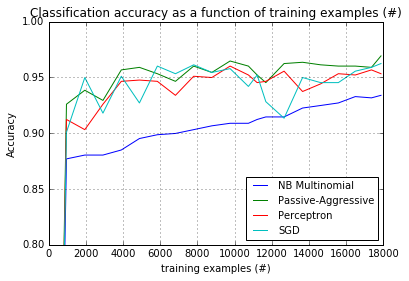

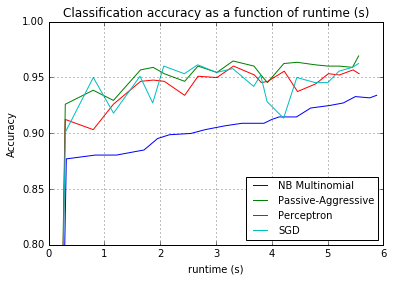

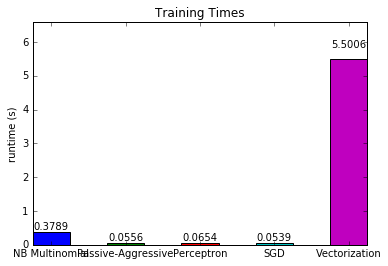

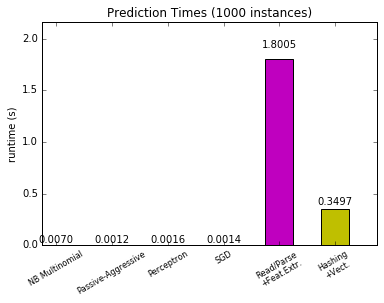

In [2]:
%matplotlib inline
from __future__ import print_function

from glob import glob
import itertools
import os.path
import re
import tarfile
import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.externals.six.moves import html_parser
from sklearn.externals.six.moves import urllib
from sklearn.datasets import get_data_home
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB


def _not_in_sphinx():
    # Hack to detect whether we are running by the sphinx builder
    return '__file__' in globals()


###############################################################################
# Reuters Dataset related routines
###############################################################################


class ReutersParser(html_parser.HTMLParser):
    """Utility class to parse a SGML file and yield documents one at a time."""

    def __init__(self, encoding='latin-1'):
        html_parser.HTMLParser.__init__(self)
        self._reset()
        self.encoding = encoding

    def handle_starttag(self, tag, attrs):
        method = 'start_' + tag
        getattr(self, method, lambda x: None)(attrs)

    def handle_endtag(self, tag):
        method = 'end_' + tag
        getattr(self, method, lambda: None)()

    def _reset(self):
        self.in_title = 0
        self.in_body = 0
        self.in_topics = 0
        self.in_topic_d = 0
        self.title = ""
        self.body = ""
        self.topics = []
        self.topic_d = ""

    def parse(self, fd):
        self.docs = []
        for chunk in fd:
            self.feed(chunk.decode(self.encoding))
            for doc in self.docs:
                yield doc
            self.docs = []
        self.close()

    def handle_data(self, data):
        if self.in_body:
            self.body += data
        elif self.in_title:
            self.title += data
        elif self.in_topic_d:
            self.topic_d += data

    def start_reuters(self, attributes):
        pass

    def end_reuters(self):
        self.body = re.sub(r'\s+', r' ', self.body)
        self.docs.append({'title': self.title,
                          'body': self.body,
                          'topics': self.topics})
        self._reset()

    def start_title(self, attributes):
        self.in_title = 1

    def end_title(self):
        self.in_title = 0

    def start_body(self, attributes):
        self.in_body = 1

    def end_body(self):
        self.in_body = 0

    def start_topics(self, attributes):
        self.in_topics = 1

    def end_topics(self):
        self.in_topics = 0

    def start_d(self, attributes):
        self.in_topic_d = 1

    def end_d(self):
        self.in_topic_d = 0
        self.topics.append(self.topic_d)
        self.topic_d = ""


def stream_reuters_documents(data_path=None):
    """Iterate over documents of the Reuters dataset.

    The Reuters archive will automatically be downloaded and uncompressed if
    the `data_path` directory does not exist.

    Documents are represented as dictionaries with 'body' (str),
    'title' (str), 'topics' (list(str)) keys.

    """

    DOWNLOAD_URL = ('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                    'reuters21578-mld/reuters21578.tar.gz')
    ARCHIVE_FILENAME = 'reuters21578.tar.gz'

    if data_path is None:
        data_path = os.path.join(get_data_home(), "reuters")
    if not os.path.exists(data_path):
        """Download the dataset."""
        print("downloading dataset (once and for all) into %s" %
              data_path)
        os.mkdir(data_path)

        def progress(blocknum, bs, size):
            total_sz_mb = '%.2f MB' % (size / 1e6)
            current_sz_mb = '%.2f MB' % ((blocknum * bs) / 1e6)
            if _not_in_sphinx():
                print('\rdownloaded %s / %s' % (current_sz_mb, total_sz_mb),
                      end='')

        archive_path = os.path.join(data_path, ARCHIVE_FILENAME)
        urllib.request.urlretrieve(DOWNLOAD_URL, filename=archive_path,
                                   reporthook=progress)
        if _not_in_sphinx():
            print('\r', end='')
        print("untarring Reuters dataset...")
        tarfile.open(archive_path, 'r:gz').extractall(data_path)
        print("done.")

    parser = ReutersParser()
    for filename in glob(os.path.join(data_path, "*.sgm")):
        for doc in parser.parse(open(filename, 'rb')):
            yield doc


###############################################################################
# Main
###############################################################################
# Create the vectorizer and limit the number of features to a reasonable
# maximum
vectorizer = HashingVectorizer(decode_error='ignore', n_features=2 ** 18,
                               non_negative=True)


# Iterator over parsed Reuters SGML files.
data_stream = stream_reuters_documents()

# We learn a binary classification between the "acq" class and all the others.
# "acq" was chosen as it is more or less evenly distributed in the Reuters
# files. For other datasets, one should take care of creating a test set with
# a realistic portion of positive instances.
all_classes = np.array([0, 1])
positive_class = 'acq'

# Here are some classifiers that support the `partial_fit` method
partial_fit_classifiers = {
    'SGD': SGDClassifier(),
    'Perceptron': Perceptron(),
    'NB Multinomial': MultinomialNB(alpha=0.01),
    'Passive-Aggressive': PassiveAggressiveClassifier(),
}


def get_minibatch(doc_iter, size, pos_class=positive_class):
    """Extract a minibatch of examples, return a tuple X_text, y.

    Note: size is before excluding invalid docs with no topics assigned.

    """
    data = [(u'{title}\n\n{body}'.format(**doc), pos_class in doc['topics'])
            for doc in itertools.islice(doc_iter, size)
            if doc['topics']]
    if not len(data):
        return np.asarray([], dtype=int), np.asarray([], dtype=int)
    X_text, y = zip(*data)
    return X_text, np.asarray(y, dtype=int)


def iter_minibatches(doc_iter, minibatch_size):
    """Generator of minibatches."""
    X_text, y = get_minibatch(doc_iter, minibatch_size)
    while len(X_text):
        yield X_text, y
        X_text, y = get_minibatch(doc_iter, minibatch_size)


# test data statistics
test_stats = {'n_test': 0, 'n_test_pos': 0}

# First we hold out a number of examples to estimate accuracy
n_test_documents = 1000
tick = time.time()
X_test_text, y_test = get_minibatch(data_stream, 1000)
parsing_time = time.time() - tick
tick = time.time()
X_test = vectorizer.transform(X_test_text)
vectorizing_time = time.time() - tick
test_stats['n_test'] += len(y_test)
test_stats['n_test_pos'] += sum(y_test)
print("Test set is %d documents (%d positive)" % (len(y_test), sum(y_test)))


def progress(cls_name, stats):
    """Report progress information, return a string."""
    duration = time.time() - stats['t0']
    s = "%20s classifier : \t" % cls_name
    s += "%(n_train)6d train docs (%(n_train_pos)6d positive) " % stats
    s += "%(n_test)6d test docs (%(n_test_pos)6d positive) " % test_stats
    s += "accuracy: %(accuracy).3f " % stats
    s += "in %.2fs (%5d docs/s)" % (duration, stats['n_train'] / duration)
    return s


cls_stats = {}

for cls_name in partial_fit_classifiers:
    stats = {'n_train': 0, 'n_train_pos': 0,
             'accuracy': 0.0, 'accuracy_history': [(0, 0)], 't0': time.time(),
             'runtime_history': [(0, 0)], 'total_fit_time': 0.0}
    cls_stats[cls_name] = stats

get_minibatch(data_stream, n_test_documents)
# Discard test set

# We will feed the classifier with mini-batches of 1000 documents; this means
# we have at most 1000 docs in memory at any time.  The smaller the document
# batch, the bigger the relative overhead of the partial fit methods.
minibatch_size = 1000

# Create the data_stream that parses Reuters SGML files and iterates on
# documents as a stream.
minibatch_iterators = iter_minibatches(data_stream, minibatch_size)
total_vect_time = 0.0

# Main loop : iterate on mini-batchs of examples
for i, (X_train_text, y_train) in enumerate(minibatch_iterators):

    tick = time.time()
    X_train = vectorizer.transform(X_train_text)
    total_vect_time += time.time() - tick

    for cls_name, cls in partial_fit_classifiers.items():
        tick = time.time()
        # update estimator with examples in the current mini-batch
        cls.partial_fit(X_train, y_train, classes=all_classes)

        # accumulate test accuracy stats
        cls_stats[cls_name]['total_fit_time'] += time.time() - tick
        cls_stats[cls_name]['n_train'] += X_train.shape[0]
        cls_stats[cls_name]['n_train_pos'] += sum(y_train)
        tick = time.time()
        cls_stats[cls_name]['accuracy'] = cls.score(X_test, y_test)
        cls_stats[cls_name]['prediction_time'] = time.time() - tick
        acc_history = (cls_stats[cls_name]['accuracy'],
                       cls_stats[cls_name]['n_train'])
        cls_stats[cls_name]['accuracy_history'].append(acc_history)
        run_history = (cls_stats[cls_name]['accuracy'],
                       total_vect_time + cls_stats[cls_name]['total_fit_time'])
        cls_stats[cls_name]['runtime_history'].append(run_history)

        if i % 3 == 0:
            print(progress(cls_name, cls_stats[cls_name]))
    if i % 3 == 0:
        print('\n')


###############################################################################
# Plot results
###############################################################################


def plot_accuracy(x, y, x_legend):
    """Plot accuracy as a function of x."""
    x = np.array(x)
    y = np.array(y)
    plt.title('Classification accuracy as a function of %s' % x_legend)
    plt.xlabel('%s' % x_legend)
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.plot(x, y)

rcParams['legend.fontsize'] = 10
cls_names = list(sorted(cls_stats.keys()))

# Plot accuracy evolution
plt.figure()
for _, stats in sorted(cls_stats.items()):
    # Plot accuracy evolution with #examples
    accuracy, n_examples = zip(*stats['accuracy_history'])
    plot_accuracy(n_examples, accuracy, "training examples (#)")
    ax = plt.gca()
    ax.set_ylim((0.8, 1))
plt.legend(cls_names, loc='best')

plt.figure()
for _, stats in sorted(cls_stats.items()):
    # Plot accuracy evolution with runtime
    accuracy, runtime = zip(*stats['runtime_history'])
    plot_accuracy(runtime, accuracy, 'runtime (s)')
    ax = plt.gca()
    ax.set_ylim((0.8, 1))
plt.legend(cls_names, loc='best')

# Plot fitting times
plt.figure()
fig = plt.gcf()
cls_runtime = []
for cls_name, stats in sorted(cls_stats.items()):
    cls_runtime.append(stats['total_fit_time'])

cls_runtime.append(total_vect_time)
cls_names.append('Vectorization')
bar_colors = rcParams['axes.color_cycle'][:len(cls_names)]

ax = plt.subplot(111)
rectangles = plt.bar(range(len(cls_names)), cls_runtime, width=0.5,
                     color=bar_colors)

ax.set_xticks(np.linspace(0.25, len(cls_names) - 0.75, len(cls_names)))
ax.set_xticklabels(cls_names, fontsize=10)
ymax = max(cls_runtime) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel('runtime (s)')
ax.set_title('Training Times')


def autolabel(rectangles):
    """attach some text vi autolabel on rectangles."""
    for rect in rectangles:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2.,
                1.05 * height, '%.4f' % height,
                ha='center', va='bottom')

autolabel(rectangles)
plt.show()

# Plot prediction times
plt.figure()
#fig = plt.gcf()
cls_runtime = []
cls_names = list(sorted(cls_stats.keys()))
for cls_name, stats in sorted(cls_stats.items()):
    cls_runtime.append(stats['prediction_time'])
cls_runtime.append(parsing_time)
cls_names.append('Read/Parse\n+Feat.Extr.')
cls_runtime.append(vectorizing_time)
cls_names.append('Hashing\n+Vect.')
bar_colors = rcParams['axes.color_cycle'][:len(cls_names)]

ax = plt.subplot(111)
rectangles = plt.bar(range(len(cls_names)), cls_runtime, width=0.5,
                     color=bar_colors)

ax.set_xticks(np.linspace(0.25, len(cls_names) - 0.75, len(cls_names)))
ax.set_xticklabels(cls_names, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(cls_runtime) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel('runtime (s)')
ax.set_title('Prediction Times (%d instances)' % n_test_documents)
autolabel(rectangles)
plt.show()